In [24]:
from nilm_analyzer.loaders import UKDALE_Loader
from matplotlib import pyplot as plt

In [25]:
ukdale_data = UKDALE_Loader(data_path=r'C:\Users\44749\NILM\nilm_analyzer_EM401\UKDALE')

Fetching the meter_appliance mapping from UKDALE metadata: C:\Users\44749\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilm_analyzer\metadata\ukdale

Loading specified buildings: [1, 2, 3, 4, 5]
Dataset successfully loaded!


In [26]:
appliance_data = ukdale_data.get_appliance_data(appliance='dishwasher', houses=[1])

Loading data for appliance DISHWASHER ...
Fetching DISHWASHER data for House 1


In [27]:
appliance_data.resample(sampling_period= 8)

Resampling for house number:  1
sampling_period = 8s, window_limit = 22 samples, fill_value = 0.0

Updating data with resampled dataset...


In [28]:
appliance_data.data

{1:                      aggregate  dishwasher
 time                                      
 2012-11-09 22:28:08      599.0         0.0
 2012-11-09 22:28:16      599.0         0.0
 2012-11-09 22:28:24      600.0         0.0
 2012-11-09 22:28:32      586.0         0.0
 2012-11-09 22:28:40      596.0         0.0
 ...                        ...         ...
 2017-04-26 17:32:08      674.0         0.0
 2017-04-26 17:32:16      667.0         1.0
 2017-04-26 17:32:24      676.5         1.0
 2017-04-26 17:32:32      667.0         1.0
 2017-04-26 17:32:40      672.0         0.0
 
 [17590985 rows x 2 columns]}

In [29]:
appliance_data.get_activations(threshold_x=10.0, threshold_y=10)

Extracting activations for House 1
Consumption Threshold is set to = 10
Time Delay Threshold is set to = 10.0 minutes
Estimating active durations of: dishwasher
Updating activations with durations when appliance is active (above threshold).


In [30]:
appliance_data.activations[1].sort_values(by='duration_in_minutes', ascending=False)

,activity_start,activity_end,duration_in_minutes
207,2014-04-14 23:26:32,2014-04-15 01:22:08,115.600000
171,2014-01-31 22:45:36,2014-02-01 00:31:12,105.600000
50,2013-03-13 22:44:48,2013-03-14 00:29:12,104.400000
56,2013-04-02 08:01:12,2013-04-02 09:45:12,104.000000
54,2013-03-24 22:45:04,2013-03-25 00:28:48,103.733333
...,...,...,...
802,2017-01-22 14:04:08,2017-01-22 14:07:44,3.600000
25,2013-01-03 15:04:16,2013-01-03 15:07:44,3.466667
768,2016-12-17 22:41:44,2016-12-17 22:45:04,3.333333
800,2017-01-20 22:36:56,2017-01-20 22:40:16,3.333333


<Axes: xlabel='time'>

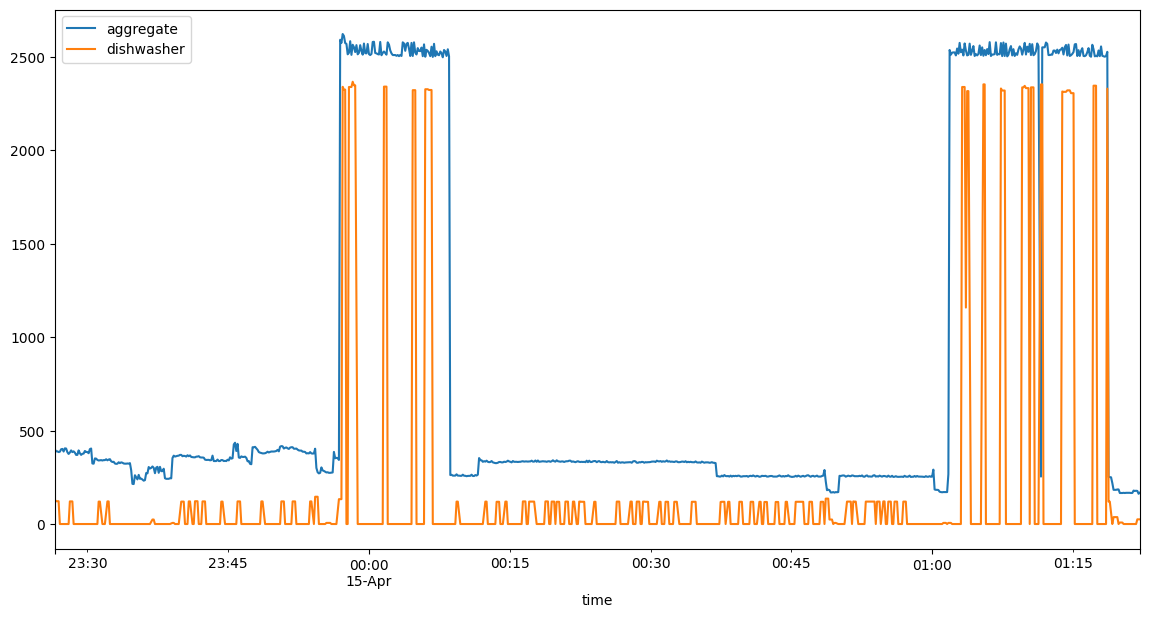

In [31]:
appliance_data.data[1].loc['2014-04-14 23:26:32':'2014-04-15 01:22:08'].plot(figsize=(14,7))

In [32]:
appliance_data.subset_data(no_of_days=1)

Subetting dataset with 1 days of data for House 1
Updating data with selected active appliance activities...


In [33]:
appliance_data.data

{1:                      aggregate  dishwasher
 time                                      
 2012-11-09 22:28:08      599.0         0.0
 2012-11-09 22:28:16      599.0         0.0
 2012-11-09 22:28:24      600.0         0.0
 2012-11-09 22:28:32      586.0         0.0
 2012-11-09 22:28:40      596.0         0.0
 ...                        ...         ...
 2012-11-10 22:27:36      444.0         1.0
 2012-11-10 22:27:44      439.0         1.0
 2012-11-10 22:27:52      424.0         1.0
 2012-11-10 22:28:00      437.0         1.0
 2012-11-10 22:28:08      440.5         1.0
 
 [10801 rows x 2 columns]}